# Fake Review Generation on the Yelp Dataset

More information on the Yelp dataset: https://www.yelp.com/dataset

In [1]:
!python3 -V

Python 3.8.15


In [2]:
!pip3 install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install transformers
!pip install fastai==2.2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 1.3 MB/s eta 0:04:18tcmalloc: large alloc 1147494400 bytes == 0x39c5a000 @  0x7fac4cb1f615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |█████████████████████████████▏  | 1055.7 MB 1.2 MB/s eta 0:01:24tcmalloc: large alloc 1434370048 bytes == 0x7e2b0000 @  0x7fac4cb1f615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |█████

In [3]:
import gc
import torch
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
from fastai.text.all import *

In [4]:
print(torch. __version__)

1.7.1+cu110


In [5]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
#!tar -xvf /content/drive/MyDrive/YelpDataset/yelp_dataset.tar

In [67]:
!ls /content/drive/MyDrive/YelpDataset/dataframes

AutoDF.pkl		     HealthMedicalDF.pkl  restaurantDF.pkl
beautyandSpaDF.pkl	     HomeServicesDF.pkl   shoppingDF.pkl
EventPlanningServicesDF.pkl  LocalServicesDF.pkl
foodDF.pkl		     NightlifeDF.pkl


In [ ]:
#%cp /content/yelp_academic_dataset_review.json /content/drive/MyDrive/YelpDataset

In [68]:
#%cp /content/drive/MyDrive/YelpDataset/yelp_academic_dataset_review.json /content/
%cp /content/drive/MyDrive/YelpDataset/dataframes/foodDF.pkl /content/

In [69]:
import pandas as pd

In [70]:
df = pd.read_pickle('foodDF.pkl')

In [71]:
df.shape

(299556, 15)

In [72]:
#process the yelp dataset in similar fashion to the amazon review dataset.
#we'll only need the text coloumn in our case
df_main = df[['text']]

In [73]:
df_main = df_main.rename(columns={'text': 'reviewText'})

In [77]:
df_main.head(20)

,reviewText
52819,Came here to print off some documents and was having a bit of difficulty. The man working did everything he could to help and we finally got my papers printed off. Great customer service! \n\nI didn't try any refreshments as I had no desire to stay long.
52820,"Naked Cyber & Expresso Bar is a 24 hours cyber cafe. On any given day you will find all kinds of people here, from students doing school work to people that just want to browse the internet. \n\nThey serve coffee, tea and some snacks. Now some people might be mistaken that they can bring their laptops to this place and work away but they do not have wireless internet here. I would assume you can connect your laptop to their internet connection if you asked them but this probably costs quite a bit. They also carry PC's and MACs.\n\nThey also host live music every now and then on their stage..."
52821,"I visited Naked for the first time this weekend since it relocated. It is a little bit smaller, but much brighter and cleaner (especially the washrooms). There is an area for music with a drum kit and several guitars. I guess if you are hanging out here and get inspired you could just grab an instrument and start improvising. My coffee was pretty good and a very large mug for $2. Best of all, now there is wifi with a purchase, although there are still computers available to use if you don't have your own. Really cool vibe here."
52822,"Neat cafe! Delicious sandwiches and sweets with great espresso. The space has a nice layout. The cafe boasts multiple computer's for rent, board games to play, a dance floor and instruments! There is always something going on at this joint. From improv to open stage nights to dance classes to Star Wars marathons....this place is busy! The proprietor is a delight and incredibly enthusiastic!"
52845,"I used to come here a lot, especially when i was younger. I remember coming here and always buying Cuban sandwiches, or buying something to drink with the ruffles chips. After many years i am highly disappointed, some of their food taste old, or has no flavor, such as their cakes. I can't complain about their workers, their workers aren't mean, they do interact with you, and are friendly, even if they have a serious face they always tend and cater to their guests, but the food needs to be stepped up! The only plus side that i see is that they finally opened on Saturday's."
52846,"The smoothies here are fantastic, they never fail to impress. You walk in here and it smells like fresh fruits. These are some of the most healthiest and flavor packed smoothies. The wait time isn't even bad, 5 mins is all it takes. In conclusion these smoothies make me so back flips. YAGA YEET!"
52847,"Not bad but a tad on the high priced side- pretty much 7-10 dollar smoothies. I know they pack a lot in, and I have enjoyed the ""Slim-N-Trim"" which has a bit less calorie intake in it. They're tasty, but not the best in town, and certainly high priced, and the drive-thru is a nice option when I'm on the go and need a quick breakfast."
52856,"Love the tap room, but I can't seem to get the hours of business right. My first visit was a kinda a let down. I had heard that bier was the place to go for great beers in Indianapolis, but I only found 2 that I liked and only 1 was memorable. However, bier rotates their taps weekly and does not seem to have any regular taps, I like this because it means that they are constantly challenging themselves to create a better beer. The tap room is a lot of fun too with people constantly revolving around the taps to taste and find their favorite for the week and then relaxing and talking in ..."
52857,"I've been in a few times now and I need to get my review in. Love this spot. Located right next door to my favorite homebrew shop, Great Fermentations, Bier is always a good time. They have growler fills every weekend with a huge line up each time. From the DFG to the Pumpkin ale, they always impress. Only issue I have is tha

In [78]:
df_main.shape

(299556, 1)

In [16]:
#sample_size = len(df_main)

In [79]:
#we sample 100,000 since we sampled 5% for restaurants which gave us around 188k samples
sample_df = df_main.sample(n=100000, random_state=2021).dropna().reset_index()

In [80]:
sample_df.dtypes

index          int64
reviewText    object
dtype: object

In [81]:
del df_main
gc.collect()

124

In [82]:
sample_df.shape

(100000, 2)

In [83]:
#Let's import the pretrained GPT2 model and the tokenizers
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

In [84]:
device = torch.device("cuda")

In [85]:
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dro

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
df_train, df_valid = train_test_split(sample_df, random_state=2021, test_size=0.1)

In [88]:
all_texts = np.concatenate([df_train["reviewText"].values, df_valid["reviewText"].values])

In [89]:
all_texts.shape

(100000,)

In [90]:
e = 0
toRemove = []
for i in range(len(all_texts)):
  if all_texts[i]=="":
    e+=1
    print(f"all_texts[{i}] is empty")
    all_texts[i] = 'a'
    toRemove.append(i)

print(f"Number of rows that are empty={e}. To remove indecies={toRemove}")

Number of rows that are empty=0. To remove indecies=[]


In [91]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [92]:
splits = [list(df_train.index), list(df_valid.index)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [31]:
"""e = 0
for i in range(len(tls.train)):
  if tls.train[i].type() != 'torch.LongTensor':
    #print(f'tls.train[{i}] not a long tensor')
    #print(f'tls.train[{i}] is a {tls.train[i].type()}')
    e+=1
print("Total of e=",e," empty")"""

'e = 0\nfor i in range(len(tls.train)):\n  if tls.train[i].type() != \'torch.LongTensor\':\n    #print(f\'tls.train[{i}] not a long tensor\')\n    #print(f\'tls.train[{i}] is a {tls.train[i].type()}\')\n    e+=1\nprint("Total of e=",e," empty")'

In [93]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([190]), torch.Size([351]))

In [94]:
show_at(tls.train, 0)

Mmmmmmm good!
TeeJay's gives me just the dessert fix I need on the northwest side of the city. I was able to meet a couple friends here and sample the new place we'd been hearing about. To our delight, the ice cream was every bit as delicious as we'd been told. The provide small samples to taste the various flavors, and actually encouraged tasting every single one.

I had a an ice cream donut sandwich, which is their signature item. Whew! So good. The only thing was that I was worried about spilling melted ice cream out of the paper wrapping. Next time, I'll try the milkshakes which I have been told are amazing.

Update: 
2nd visit and this time I went for a milkshake. I ordered the Cookie Monster milkshake (they have a new ice cream flavor - Cookie Monster). This thing is sooooo good!


In [95]:
show_at(tls.valid, 0)

I was looking so forward to the Wine Fest!  I have gone the past two years and this year we were bringing others so they could have as much fun as we did.   I can't say we are going to go back next year.  

I understand the price of the ticket, $20.  I enjoy the little glass I get.  What I don't enjoy is standing in line an hour to get in only to be told "You should have bought a VIP ticket and gotten in earlier if didn't want to wait in line."  Wait, what?  

The Wine Fest has gone from people actually wanting to learn a little to those who just wanted to get drunk. I have several pictures from the event of people passed out on the lawn.  

It was a warm day so we needed to buy water.  Guess what, not all vendors can sell water, only a select number of vendors could - and they had run out.  Why would water be an item that every vendor can't sell?  I understand not wanting to have 50 pizza joints - but come on - we all need water.  

The tasting lines were terribly long with some peopl

In [96]:
bs,sl = 4,200
dls = tls.dataloaders(bs=bs, seq_len=sl, device=device)

Token indices sequence length is longer than the specified maximum sequence length for this model (1091 > 1024). Running this sequence through the model will result in indexing errors


In [97]:
dls.show_batch(max_n=2)

,text,text_
0,"In town on business and one of my colleagues spotted this place while wandering the night before. The post-its caught her attention, and I'm glad they did!\n\nI had Nocturne and it was fantastic! Very creamy, sweet, and the berries were mixed in perfectly. We had a large order but the staff moved quickly and we didn't have to wait long for our treats. \n\nThe servings are big, and you can't really get ice cream any fresher. I'd go again (and might squeeze in one more visit before we leave). \n\nAlso - they are open late! It seems like this part of St. Louis is a ghost town in the evening, so we were glad to find it open.Shayne was awesome! This was our first time here so we had no idea what to order, and Shayne was super helpful and answered all of our questions. We tried a few flavors","town on business and one of my colleagues spotted this place while wandering the night before. The post-its caught her attention, and I'm glad they did!\n\nI had Nocturne and it was fantastic! Very creamy, sweet, and the berries were mixed in perfectly. We had a large order but the staff moved quickly and we didn't have to wait long for our treats. \n\nThe servings are big, and you can't really get ice cream any fresher. I'd go again (and might squeeze in one more visit before we leave). \n\nAlso - they are open late! It seems like this part of St. Louis is a ghost town in the evening, so we were glad to find it open.Shayne was awesome! This was our first time here so we had no idea what to order, and Shayne was super helpful and answered all of our questions. We tried a few flavors"
1,"pickles (which btw, are cheaper than at Schnuck's)! Um...the women at the deli counter know that I eat those too.I don't know why I come here other than the convenient location. It's depressing to shop here. I don't know how they stay in business.I had sushi from Meijer, and it was very good! Never having eaten grocer sushi, this was a big personal experiment. I bought some low sodium soy, and picked up some extra (free) ginger, and wasabi. It seemed kinda pricey, but it turned out awesome!We pulled up to this winery and the place looked deserted. Of course we went on a random Tuesday during the day so we weren't surprised. The staff was very friendly and helpful with the tasting and explained in detail about each wine we tasted. Atmosphere was amazing. The grounds were beautiful. I am excited to keep an eye on their","les (which btw, are cheaper than at Schnuck's)! Um...the women at the deli counter know that I eat those too.I don't know why I come here other than the convenient location. It's depressing to shop here. I don't know how they stay in business.I had sushi from Meijer, and it was very good! Never having eaten grocer sushi, this was a big personal experiment. I bought some low sodium soy, and picked up some extra (free) ginger, and wasabi. It seemed kinda pricey, but it turned out awesome!We pulled up to this winery and the place looked deserted. Of course we went on a random Tuesday during the day so we weren't surprised. The staff was very friendly and helpful with the tasting and explained in detail about each wine we tasted. Atmosphere was amazing. The grounds were beautiful. I am excited to keep an eye on their upcoming"


### Fine Tuning 

In [98]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [99]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

In [100]:
learn.validate()

(#2) [3.81689190864563,45.462684631347656]

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.2089296132326126)

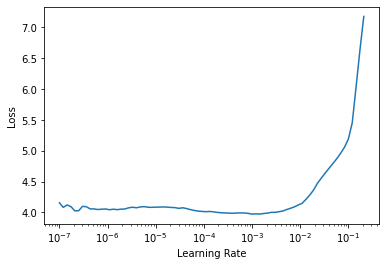

In [101]:
learn.lr_find()

In [102]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,perplexity,time
0,3.529143,3.472490,32.216866,40:21


A perplexity of 100 means that whenever the model is predicting the next word, the model is as confused as if it had to pick between 100 different words

In [103]:
#save model weights. Commented out since we don't need it now
learn.save("gpt2-finetuned-yelp-reviews-sample-1cycle-Food")

Path('models/gpt2-finetuned-yelp-reviews-sample-1cycle-Food.pth')

In [104]:
%cp /content/models/gpt2-finetuned-yelp-reviews-sample-1cycle-Food.pth /content/drive/MyDrive/YelpDataset/models

In [105]:
df_valid.head(1)

,index,reviewText
23307,7918675,Love this corner ice cream shop in the historic Shaw neighborhood. We always bring our pups here and sit outside on the cute patio adorned with festive blue umbrellas. (They also make treats for dogs!) \nBecause of their popularity they usually have a line but it moves so fast you hardly notice. Plus it gives you time to watch the ice cream being made and to scope out all the flavors from vegan to boozy. I usually get the German chocolate or the cherry cordial. I would definitely recommend a visit!!


### Review Example 1

In [106]:
prompt = "Not satisfied with the coffee"

In [107]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 5])

In [108]:
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [109]:
tokenizer.decode(preds[0].cpu().numpy())

'Not satisfied with the coffee. \n\nI ordered a latte with oat milk and it was very watered down. It tasted like it had been sitting there for a long time. The coffee'

### Review Example 2



In [114]:
prompt = "The blue cake"

In [115]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 3])

In [116]:
preds = learn.model.generate(inp, max_length=60, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [117]:
tokenizer.decode(preds[0].cpu().numpy())

"The blue cake donuts are the best I've ever had. \n\nThe staff is super friendly and helpful. They are always willing to help you find what you're looking for. I love the fact that they are open 24/7. It's a great place to grab a donut"

### Review Example 3



In [130]:
prompt = "The bread at Bob"

In [131]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 4])

In [132]:
preds = learn.model.generate(inp, max_length=60, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [133]:
tokenizer.decode(preds[0].cpu().numpy())

"The bread at Boba Tea is the best I've ever had. The boba is so soft and chewy that it's hard to eat it. \n\nThe staff is super friendly and the place is always clean. It's a great place to hang out with a friend or have a"

### Review Example 4



In [138]:
prompt = "The staff was barista"

In [139]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 5])

In [140]:
preds = learn.model.generate(inp, max_length=50, num_beams=10, temperature=0.75, early_stopping=True, no_repeat_ngram_size=5)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [141]:
tokenizer.decode(preds[0].cpu().numpy())

'The staff was barista friendly and the coffee was delicious. I would definitely recommend this place to anyone looking for a great cup of coffee and a great place to meet up with a friend.This is a great place to go if you are looking for'